# Visualizing Model Performance

In this notebook I visualize model performance by creating confusion matrices and tables. I also take a look at posts that were misclassified by all models

In [19]:
import pandas as pd
import reddit_functions as rf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve

## Confusion Matrices

### Models trained on full data

In [15]:
predictions = pd.read_csv('../data/predictions/predictions_all_data.csv')
predictions_final = pd.read_csv('../data/predictions/predictions_unique_removed.csv')

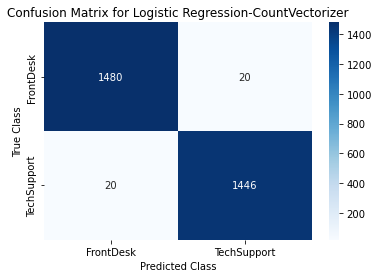

In [6]:
rf.plot_conf_matrix(predictions['y_true'], predictions['y_logreg_cvec'],
                 title='Confusion Matrix for Logistic Regression-CountVectorizer',
                 filename='gridsearch-logreg-cvec.png',
                   cmap='Blues')

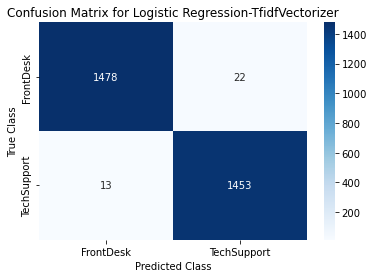

In [8]:
rf.plot_conf_matrix(predictions['y_true'], predictions['y_logreg_tvec'],
                 title='Confusion Matrix for Logistic Regression-TfidfVectorizer',
                 filename='gridsearch-logreg-tvec.png',
                   cmap='Blues')

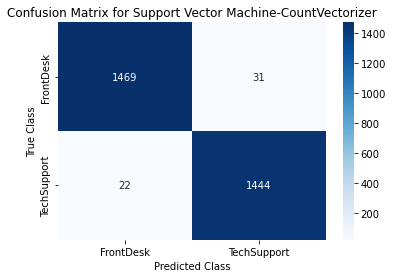

In [9]:
rf.plot_conf_matrix(predictions['y_true'], predictions['y_svm_cvec'],
                 title='Confusion Matrix for Support Vector Machine-CountVectorizer',
                 filename='gridsearch-svm-cvec.png',
                   cmap='Blues')

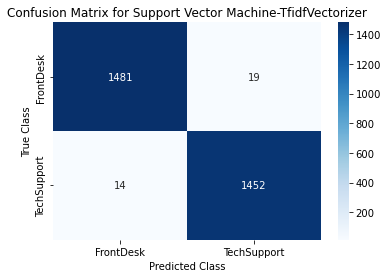

In [10]:
rf.plot_conf_matrix(predictions['y_true'], predictions['y_svm_tvec'],
                 title='Confusion Matrix for Support Vector Machine-TfidfVectorizer',
                 filename='gridsearch-svm-tvec.png',
                   cmap='Blues')

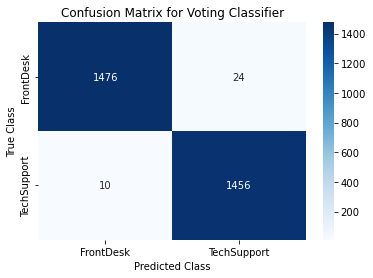

In [13]:
rf.plot_conf_matrix(predictions['y_true'], predictions['y_vc'],
                 title='Confusion Matrix for Voting Classifier',
                 filename='gridsearch_vc.png',
                   cmap='Blues')

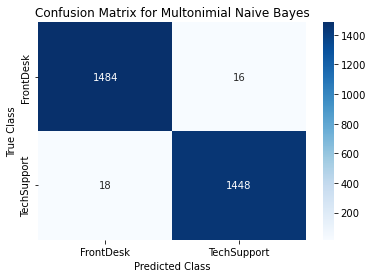

In [67]:
rf.plot_conf_matrix(predictions['y_true'], predictions['y_mnb'],
                 title='Confusion Matrix for Multonimial Naive Bayes',
                 filename='gridsearch_mnb.png',
                   cmap='Blues')

### Models trained on Modified Data

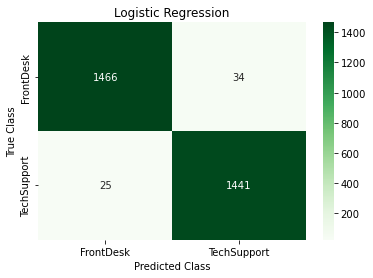

In [5]:
rf.plot_conf_matrix(predictions_final['y_true'], predictions_final['y_logreg'],
                 title='Logistic Regression',
                 filename='logreg.png',
                   cmap='Greens')

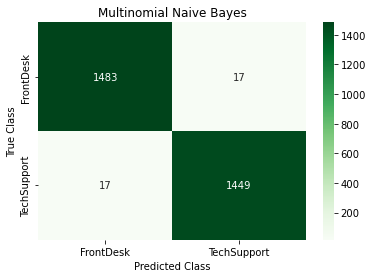

In [6]:
rf.plot_conf_matrix(predictions_final['y_true'], predictions_final['y_mnb'],
                 title='Multinomial Naive Bayes',
                 filename='mnb.png',
                   cmap='Greens')

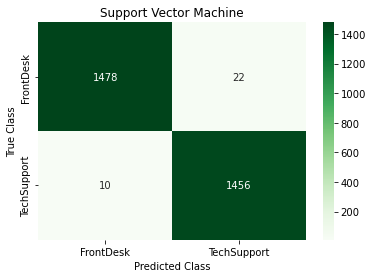

In [18]:
rf.plot_conf_matrix(predictions_final['y_true'], predictions_final['y_svm'],
                 title='Support Vector Machine',
                 filename='svm.png',
                   cmap='Greens')

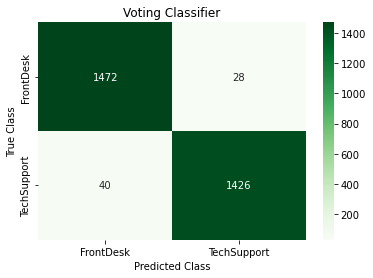

In [17]:
rf.plot_conf_matrix(predictions_final['y_true'], predictions_final['y_vc'],
                 title='Voting Classifier',
                 filename='vc.png',
                   cmap='Greens')

## Model Metrics

### Models trained on full data

In [20]:
predictions.columns

Index(['X_test', 'y_true', 'y_logreg_cvec', 'y_logreg_tvec', 'y_svm_cvec',
       'y_svm_tvec', 'y_mnb', 'y_vc'],
      dtype='object')

In [76]:
accuracy = [
    accuracy_score(predictions['y_true'], predictions['y_logreg_cvec']),
    accuracy_score(predictions['y_true'], predictions['y_logreg_tvec']),
    accuracy_score(predictions['y_true'], predictions['y_svm_cvec']),
    accuracy_score(predictions['y_true'], predictions['y_svm_tvec']),
    accuracy_score(predictions['y_true'], predictions['y_mnb']),
    accuracy_score(predictions['y_true'], predictions['y_vc']),
           ]


recall = [
    recall_score(predictions['y_true'], predictions['y_logreg_cvec']),
    recall_score(predictions['y_true'], predictions['y_logreg_tvec']),
    recall_score(predictions['y_true'], predictions['y_svm_cvec']),
    recall_score(predictions['y_true'], predictions['y_svm_tvec']),
    recall_score(predictions['y_true'], predictions['y_mnb']),
    recall_score(predictions['y_true'], predictions['y_vc']),
           ]

precision = [
    precision_score(predictions['y_true'], predictions['y_logreg_cvec']),
    precision_score(predictions['y_true'], predictions['y_logreg_tvec']),
    precision_score(predictions['y_true'], predictions['y_svm_cvec']),
    precision_score(predictions['y_true'], predictions['y_svm_tvec']),
    precision_score(predictions['y_true'], predictions['y_mnb']),
    precision_score(predictions['y_true'], predictions['y_vc']),
           ]

In [77]:
metrics_all_data = pd.DataFrame(data={
                                    'Accuracy': accuracy,
                                    'Recall' : recall,
                                    'Precision': precision
                                },
                               index = ['LogReg-CVec', 'LogReg-TVec', 'SVM-CVec', 'SVM-TVec', 'MNBayes', 'VotingC'])
metrics_all_data.sort_values(by='Accuracy', ascending=False)

,Accuracy,Recall,Precision
SVM-TVec,0.988874,0.990450,0.987084
MNBayes,0.988537,0.987722,0.989071
VotingC,0.988537,0.993179,0.983784
LogReg-TVec,0.988200,0.991132,0.985085
LogReg-CVec,0.986514,0.986357,0.986357
SVM-CVec,0.982131,0.984993,0.978983


**Save Metrics to .csv**

In [28]:
metrics_all_data.to_csv('../data/predictions/metrics_all_data.csv', index=False)

### Models trained on modified data

In [29]:
predictions_final.columns

Index(['X_test', 'y_true', 'y_logreg', 'y_mnb', 'y_svm', 'y_vc'], dtype='object')

In [31]:
accuracy = [
    accuracy_score(predictions_final['y_true'], predictions_final['y_logreg']),
    accuracy_score(predictions_final['y_true'], predictions_final['y_svm']),
    accuracy_score(predictions_final['y_true'], predictions_final['y_mnb']),
    accuracy_score(predictions_final['y_true'], predictions_final['y_vc']),
           ]


recall = [
    recall_score(predictions_final['y_true'], predictions_final['y_logreg']),
    recall_score(predictions_final['y_true'], predictions_final['y_svm']),
    recall_score(predictions_final['y_true'], predictions_final['y_mnb']),
    recall_score(predictions_final['y_true'], predictions_final['y_vc']),
           ]

precision = [
    precision_score(predictions_final['y_true'], predictions_final['y_logreg']),
    precision_score(predictions_final['y_true'], predictions_final['y_svm']),
    precision_score(predictions_final['y_true'], predictions_final['y_mnb']),
    precision_score(predictions_final['y_true'], predictions_final['y_vc']),
           ]

In [32]:
metrics_unique_removed = pd.DataFrame(data={
                                    'Accuracy': accuracy,
                                    'Recall' : recall,
                                    'Precision': precision
                                },
                               index = ['LogReg', 'SVM', 'MNBayes', 'VotingC'])
metrics_unique_removed.sort_values(by='Accuracy', ascending=False)

,Accuracy,Recall,Precision
SVM,0.989211,0.993179,0.985115
MNBayes,0.988537,0.988404,0.988404
LogReg,0.980108,0.982947,0.976949
VotingC,0.977073,0.972715,0.980743


**Save Metrics to .csv**

In [33]:
metrics_unique_removed.to_csv('../data/predictions/metrics_unique_removed.csv', index=False)

## **Look at Data that the models got wrong**

### Predictions from full data set

In [42]:
predictions.columns

Index(['X_test', 'y_true', 'y_logreg_cvec', 'y_logreg_tvec', 'y_svm_cvec',
       'y_svm_tvec', 'y_mnb', 'y_vc'],
      dtype='object')

In [43]:
wrong_logreg_cvec = predictions[predictions['y_true']!=predictions['y_logreg_cvec']].index

In [44]:
wrong_logreg_tvec = predictions[predictions['y_true']!=predictions['y_logreg_tvec']].index

In [45]:
wrong_svm_cvec = predictions[predictions['y_true']!=predictions['y_svm_cvec']].index

In [46]:
wrong_svm_tvec = predictions[predictions['y_true']!=predictions['y_svm_tvec']].index

In [47]:
wrong_mnb = predictions[predictions['y_true']!=predictions['y_mnb']].index

In [48]:
wrong_vc = predictions[predictions['y_true']!=predictions['y_vc']].index

In [55]:
wrong_all=(((set(wrong_logreg_cvec).intersection(set(wrong_logreg_tvec))).intersection(wrong_mnb)).intersection(set(wrong_vc))).intersection(set(wrong_svm_cvec).intersection(set(wrong_svm_tvec)))

In [57]:
wrong_all = list(wrong_all)

In [60]:
predictions.loc[wrong_all]['X_test']

293     This was early 2020, I was at work, high out o...
423     So we have a 2018 Bullfrog X7L.  Love it.\n\nB...
135     This happens a year ago  approximately i was n...
2481    I work at a very small animal hospital. It's m...
307     Hello! I am tasked with asking some questions ...
728     Hey everyone, its been a stressful time for al...
1023    A little bit of background : House Music was b...
Name: X_test, dtype: object

### Predictions from dataset with unique words removed

In [61]:
wrong_logreg = set(predictions_final[predictions_final['y_true']!=predictions_final['y_logreg']].index)

In [62]:
wrong_svm = set(predictions_final[predictions_final['y_true']!=predictions_final['y_svm']].index)

In [63]:
wrong_mnb = set(predictions_final[predictions_final['y_true']!=predictions_final['y_mnb']].index)

In [64]:
wrong_vc = set(predictions_final[predictions_final['y_true']!=predictions_final['y_vc']].index)

In [65]:
wrong_all_unique = set.intersection(wrong_logreg, wrong_svm, wrong_mnb, wrong_vc)

In [66]:
wrong_all_unique

{135, 293, 423, 464, 740}

In [68]:
predictions.loc[wrong_all]['X_test']

293     This was early 2020, I was at work, high out o...
423     So we have a 2018 Bullfrog X7L.  Love it.\n\nB...
135     This happens a year ago  approximately i was n...
2481    I work at a very small animal hospital. It's m...
307     Hello! I am tasked with asking some questions ...
728     Hey everyone, its been a stressful time for al...
1023    A little bit of background : House Music was b...
Name: X_test, dtype: object

In [71]:
predictions.loc[423]['X_test']

'So we have a 2018 Bullfrog X7L.  Love it.\n\nBack in Aug 2018 when we bought it, all said and done (including extended warranty), out the door we paid about $6700us.\n\nYesterday while we were at the same retailer looking at new patio furniture, I walked over to check prices.\n\nThey now have an X7L Choice.  So add in all the features that came standard on our tub, excluding warranty...\n\n$13,476!!!!\nAnd that\'s the "sale" price\n\nI\'ve read posts where people stated crazy prices, but this is the first time I\'ve seen it myself.\n\nOne of the sales guys walked over and I said "Wow, the prices are crazy this year".  He smiled and said "yea, and we\'re eight months out for delivery.  I can knock $2,000 off right now if you buy today".\n\nI totally bummed him out when I said "Thank you but no.  My 2018 X7L that I paid less than $7,000 for from you guys is working just fine".'

In [72]:
predictions.loc[464]['X_test']

"Has anyone been on a LOTdodomu flight and could tell me how they handle luggage weight? You can add up to 5x23kg for free but I don't have any need for that many suitcases. I'm wondering if in this situation would they look past a 2-3kg overweight luggage?"

In [73]:
predictions.loc[464]['y_true']

1

In [74]:
predictions.loc[740]['X_test']

"This was a local customer who, thanks to investors, had more money than brains and hired all his friends to manage some shops in a small high end community. Every month one of the bars is showing thousands of dollars in losses of liquor and they just can't seem to figure it out. Since they're using our software for inventory management, they want us to tell them where all that liquor is going. Unfortunately, all we can do is show them receipts, sales, adjustments and physical inventory. The losses all become evident at each physical inventory so to me the obvious answer is that the liquor is walking out that door in large quantities and nobody is paying for it. \n\nThe money guy scoffs at me and insists that there must be a software bug because there's no way that much inventory gets stolen without him seeing it. He believes that the liquor is being sold but just not recorded. Which of course in my mind should leave you with massive overages in your cash drawer but sales from the POS 